# E2a: Küchentischversuch zum Laval-Rotor

Name: Christoph Fröhlich  
Datum: 19.12.2023  

## Forschungsfrage

Wie genau können die Frequenzen von Haushaltsgeräten mit den Beschleunigungssensoren ermittelt werden?

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

![Lautsprecher](figures/Lautsprecher.jpg)

- Beschreibung des Aufbaus: Beschleunigungssenor liegt auf dem Lautsprecher auf, welcher basslastige Musik abspielt.
- Vorgangsbeschreibung: Der Beschleunigungsensor wird durch die Frequenzen, insbesondere durch die tiefen, in Bewegung versetzt und erfährt dreiachsige Beschleunigungen.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20231219_163833_ChristophFröhlich_accelerometer_lautsprecher" # replace None by the relative path to the first object's folder
h5_file_name = "data_20231219_163833_ChristophFröhlich_accelerometer.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20231219_163833_ChristophFr\u00f6hlich_accelerometer_lautsprecher/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20231219_163833_ChristophFr\u00f6hlich_accelerometer_lautsprecher/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20231219_163833_ChristophFr\u00f6hlich_accelerometer_lautsprecher/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1ee847c5-6dd5-6ecf-aa58-0341b02a1b83": {
    

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:
file_path = os.path.join(path_measurement_folder, h5_file_name)
x_np = None
y_np = None
z_np = None
t_np = None


with h5py.File(file_path, "r") as hdf_file:
    # Iterate over the items in the file
    for group_name, group in hdf_file.items():
        print(f"Group: {group_name}")

        # Iterate over datasets in the group
        for dataset_name, dataset in group.items():
            values = np.array(dataset[:])

            if dataset_name == "acceleration_x":
                x_np = values
            elif dataset_name == "acceleration_y":
                y_np = values
            elif dataset_name == "acceleration_z":
                z_np = values
            elif dataset_name == "timestamp":
                t_np = values
                

Group: 1ee847be-fddd-6ee4-892a-68c4555b0981


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [5]:
results = np.empty_like(x_np, dtype=float)

for i, (x_val, y_val, z_val) in enumerate(zip(x_np, y_np, z_np)):
    result = get_vec_accel(x_val, y_val, z_val)
    results[i] = result

#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


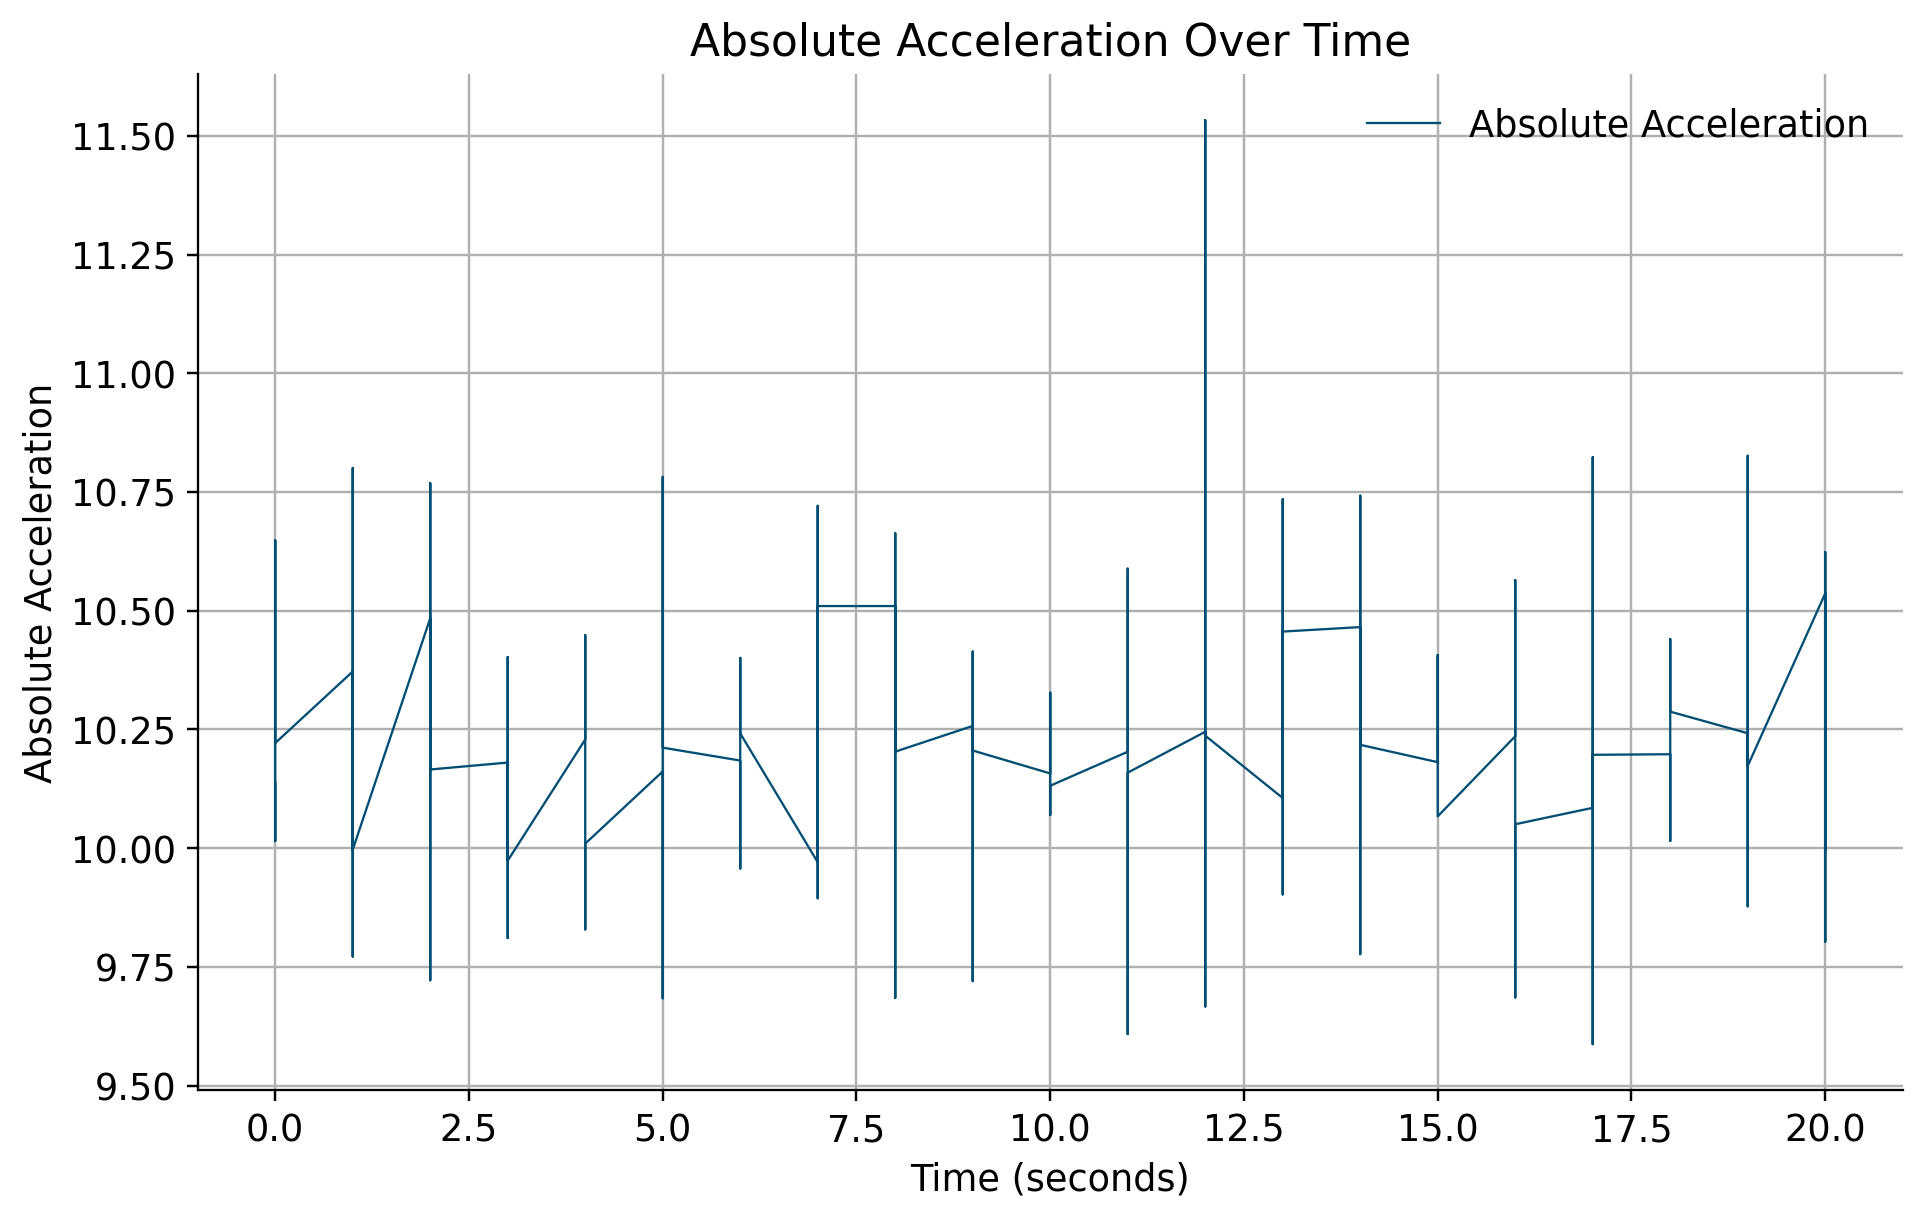

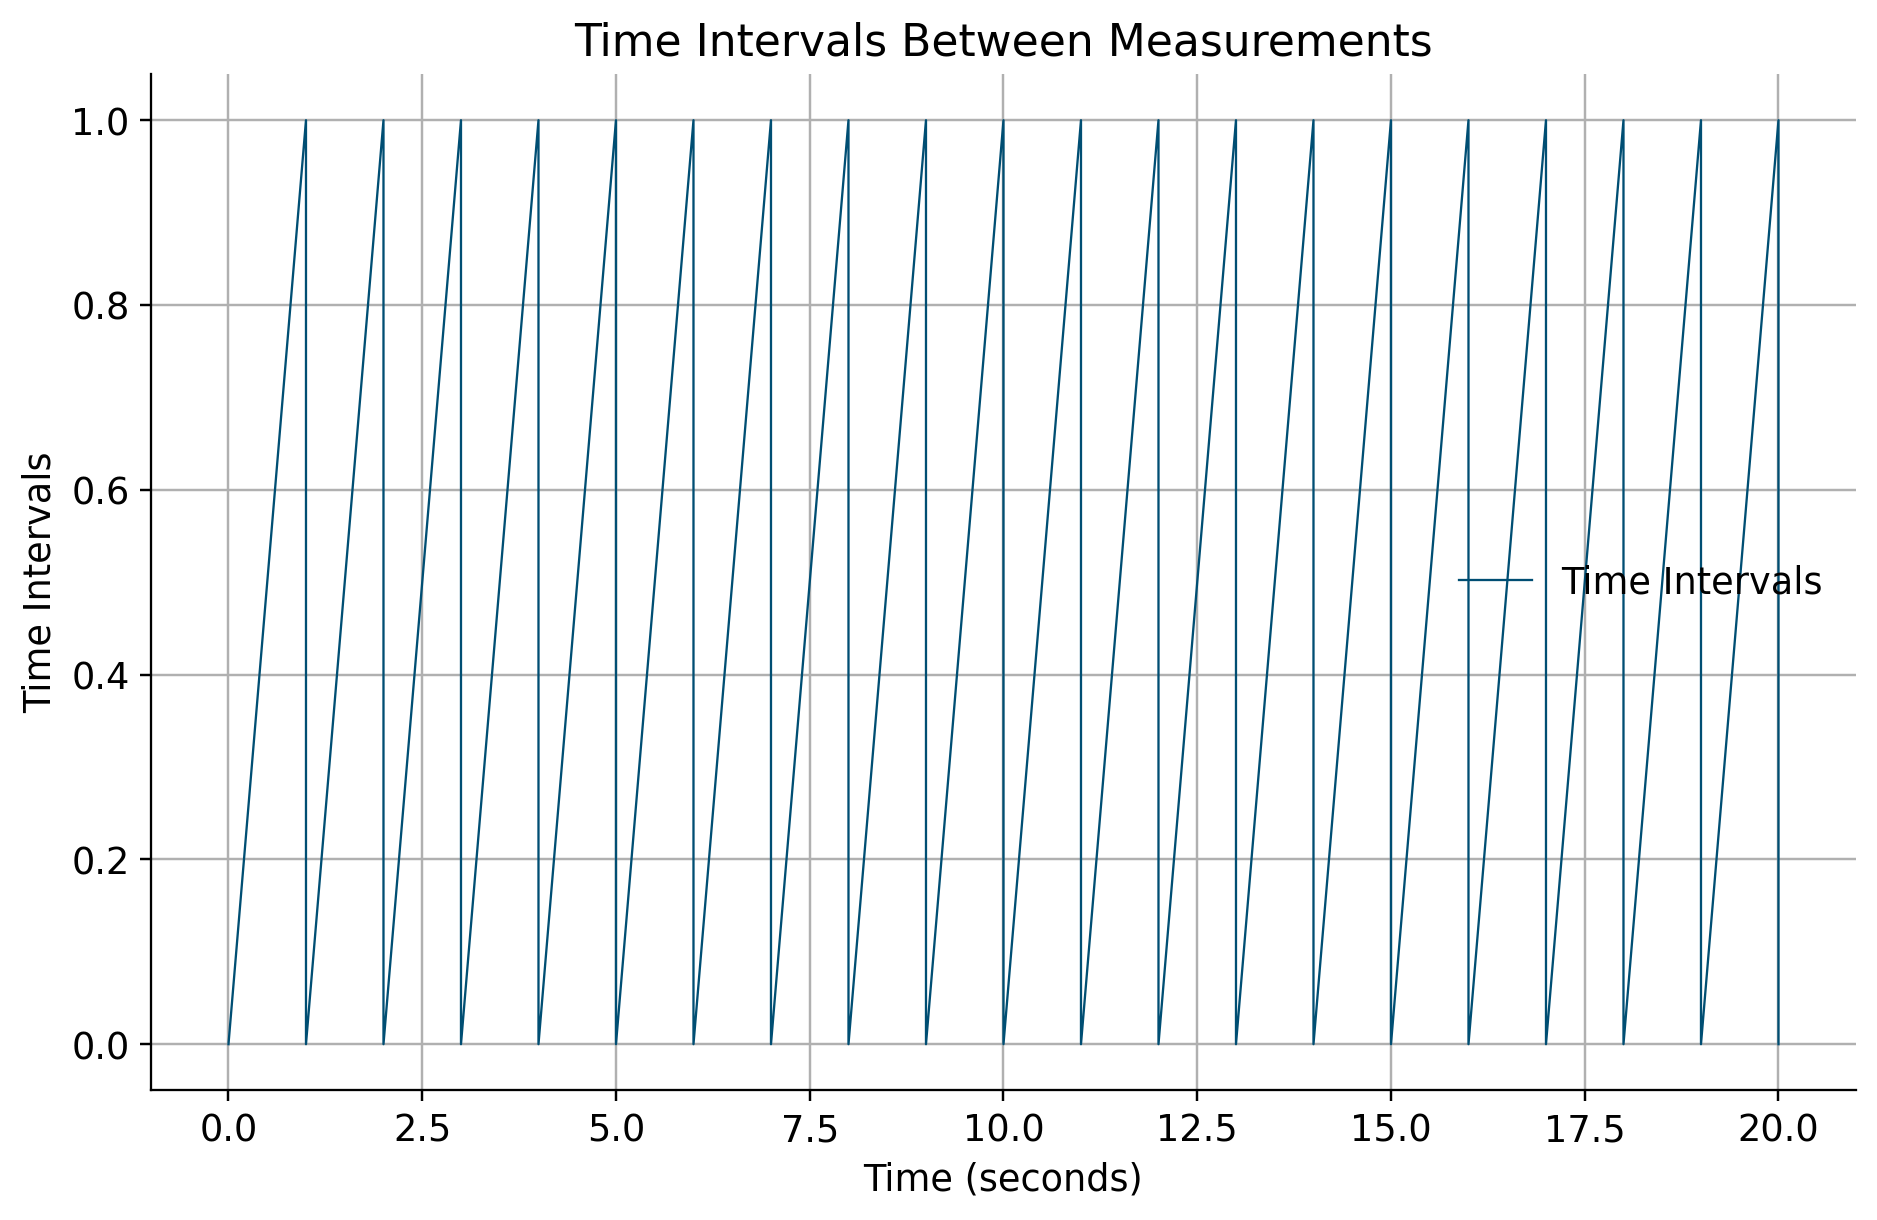

In [6]:
# Plotting the absolute acceleration over time
plt.figure(figsize=(10, 6))
plt.plot(t_np, results, label='Absolute Acceleration')
plt.title('Absolute Acceleration Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Absolute Acceleration')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the time intervals
time_intervals = np.diff(t_np)  # Calculate time intervals
plt.figure(figsize=(10, 6))
plt.plot(t_np[1:], time_intervals, label='Time Intervals')
plt.title('Time Intervals Between Measurements')
plt.xlabel('Time (seconds)')
plt.ylabel('Time Intervals')
plt.legend()
plt.grid(True)
plt.show()


#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [7]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.
equidistant_time_points, interpolated_data = interpolation(t_np, results)

#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

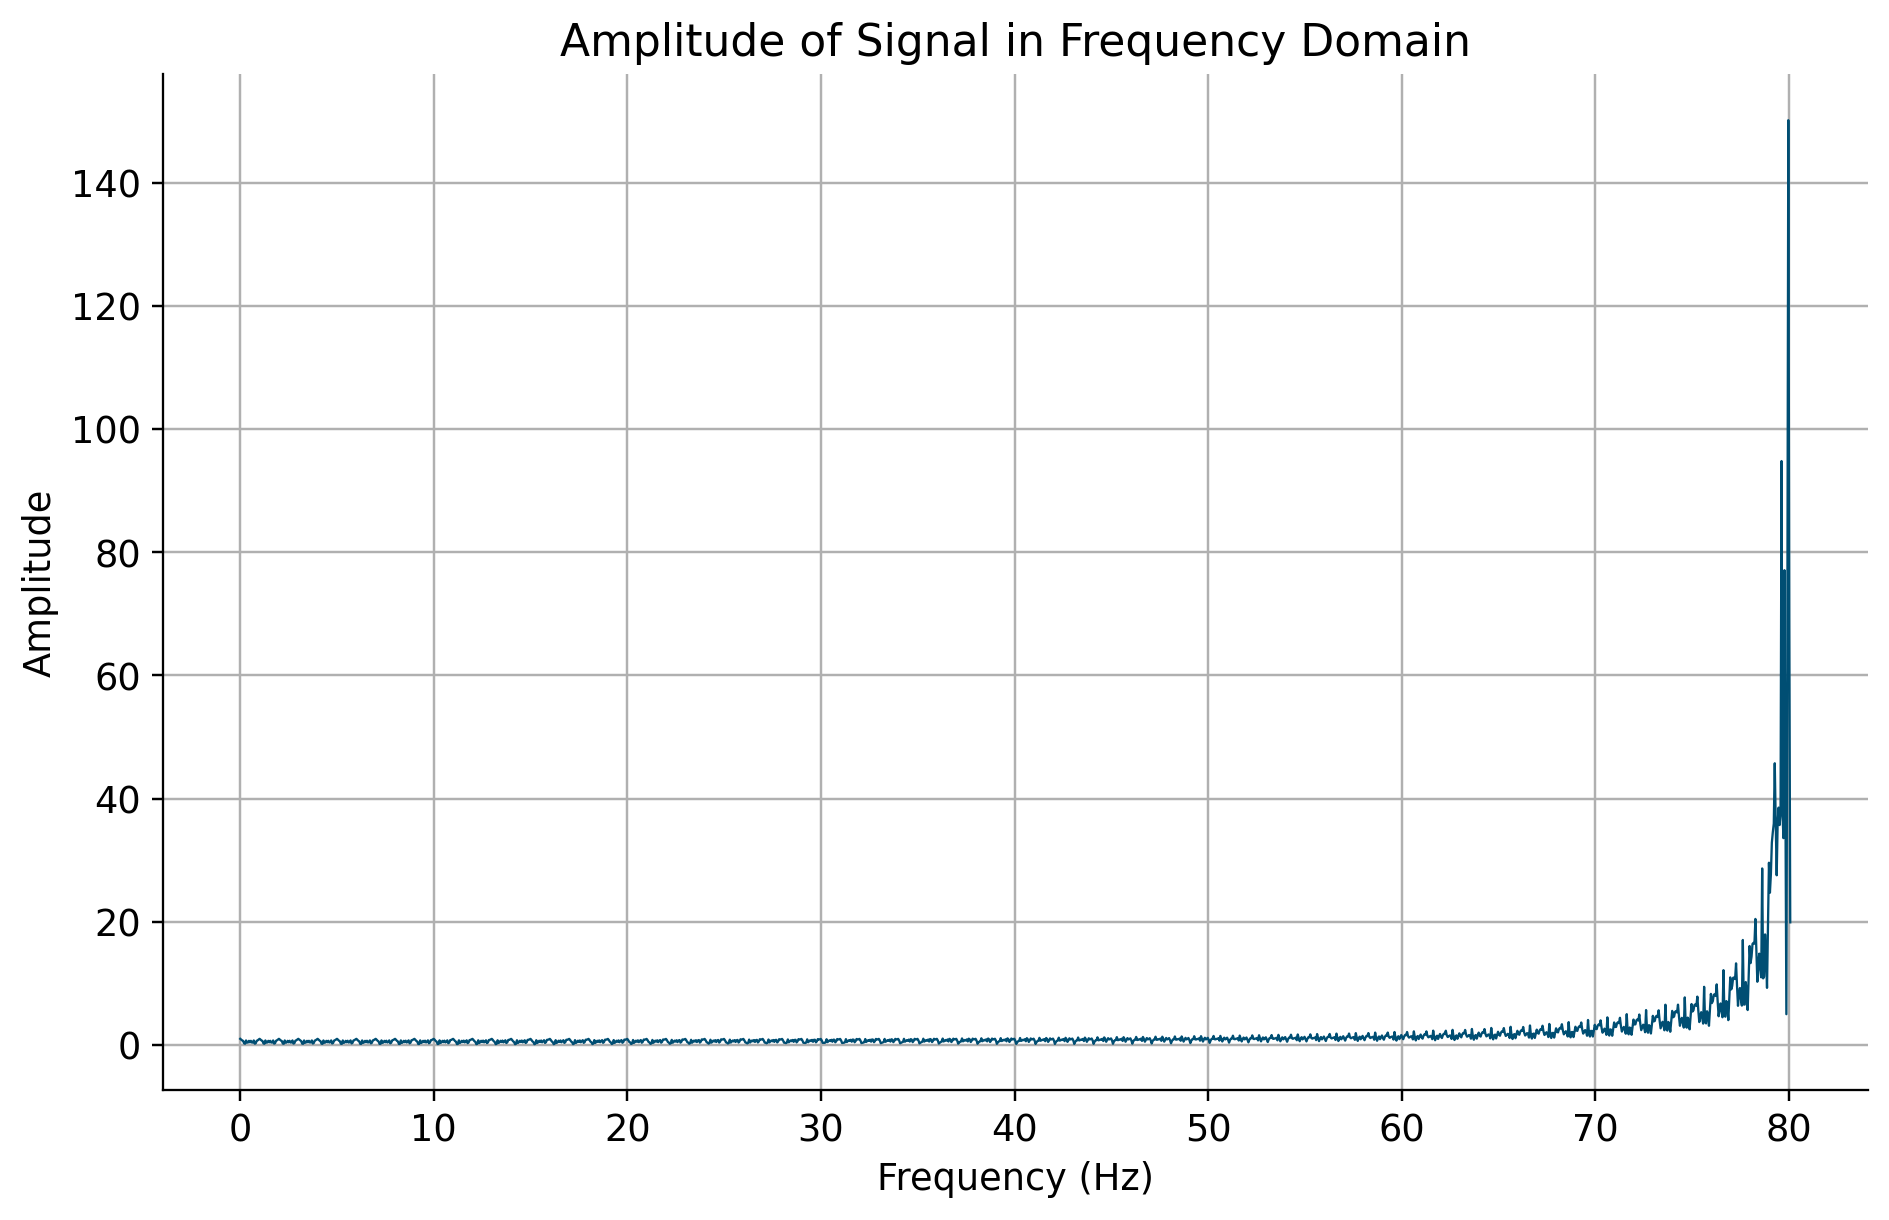

In [8]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Berechnen der FFT
amplitude, frequencies = my_fft(interpolated_data, equidistant_time_points)



plt.figure(figsize=(10, 6))
plt.plot(frequencies, amplitude)
plt.title('Amplitude of Signal in Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

![Handy](figures/Handy.jpg)

- Beschreibung des Aufbaus: Beschleunigungssenor liegt auf dem Handy auf, welches durch einen Anruf vibriert.
- Vorgangsbeschreibung: Der Beschleunigungsensor wird durch die Vibrationen des Handys in Bewegung versetzt und erfährt dreiachsige Beschleunigungen.


## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [9]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20231219_164437_ChristophFröhlich_accelerometer_handy" # replace None by the relative path to the first object's folder
h5_file_name = "data_20231219_164437_ChristophFröhlich_accelerometer.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [10]:
file_path = os.path.join(path_measurement_folder, h5_file_name)
x_np = None
y_np = None
z_np = None
t_np = None


with h5py.File(file_path, "r") as hdf_file:
    # Iterate over the items in the file
    for group_name, group in hdf_file.items():
        print(f"Group: {group_name}")

        # Iterate over datasets in the group
        for dataset_name, dataset in group.items():
            values = np.array(dataset[:])

            if dataset_name == "acceleration_x":
                x_np = values
            elif dataset_name == "acceleration_y":
                y_np = values
            elif dataset_name == "acceleration_z":
                z_np = values
            elif dataset_name == "timestamp":
                t_np = values
                

Group: 1ee847be-fddd-6ee4-892a-68c4555b0981


#### 2. Betrag der Beschleunigung berechnen


In [11]:
results = np.empty_like(x_np, dtype=float)

for i, (x_val, y_val, z_val) in enumerate(zip(x_np, y_np, z_np)):
    result = get_vec_accel(x_val, y_val, z_val)
    results[i] = result

#### 3. Darstellung der Messdaten

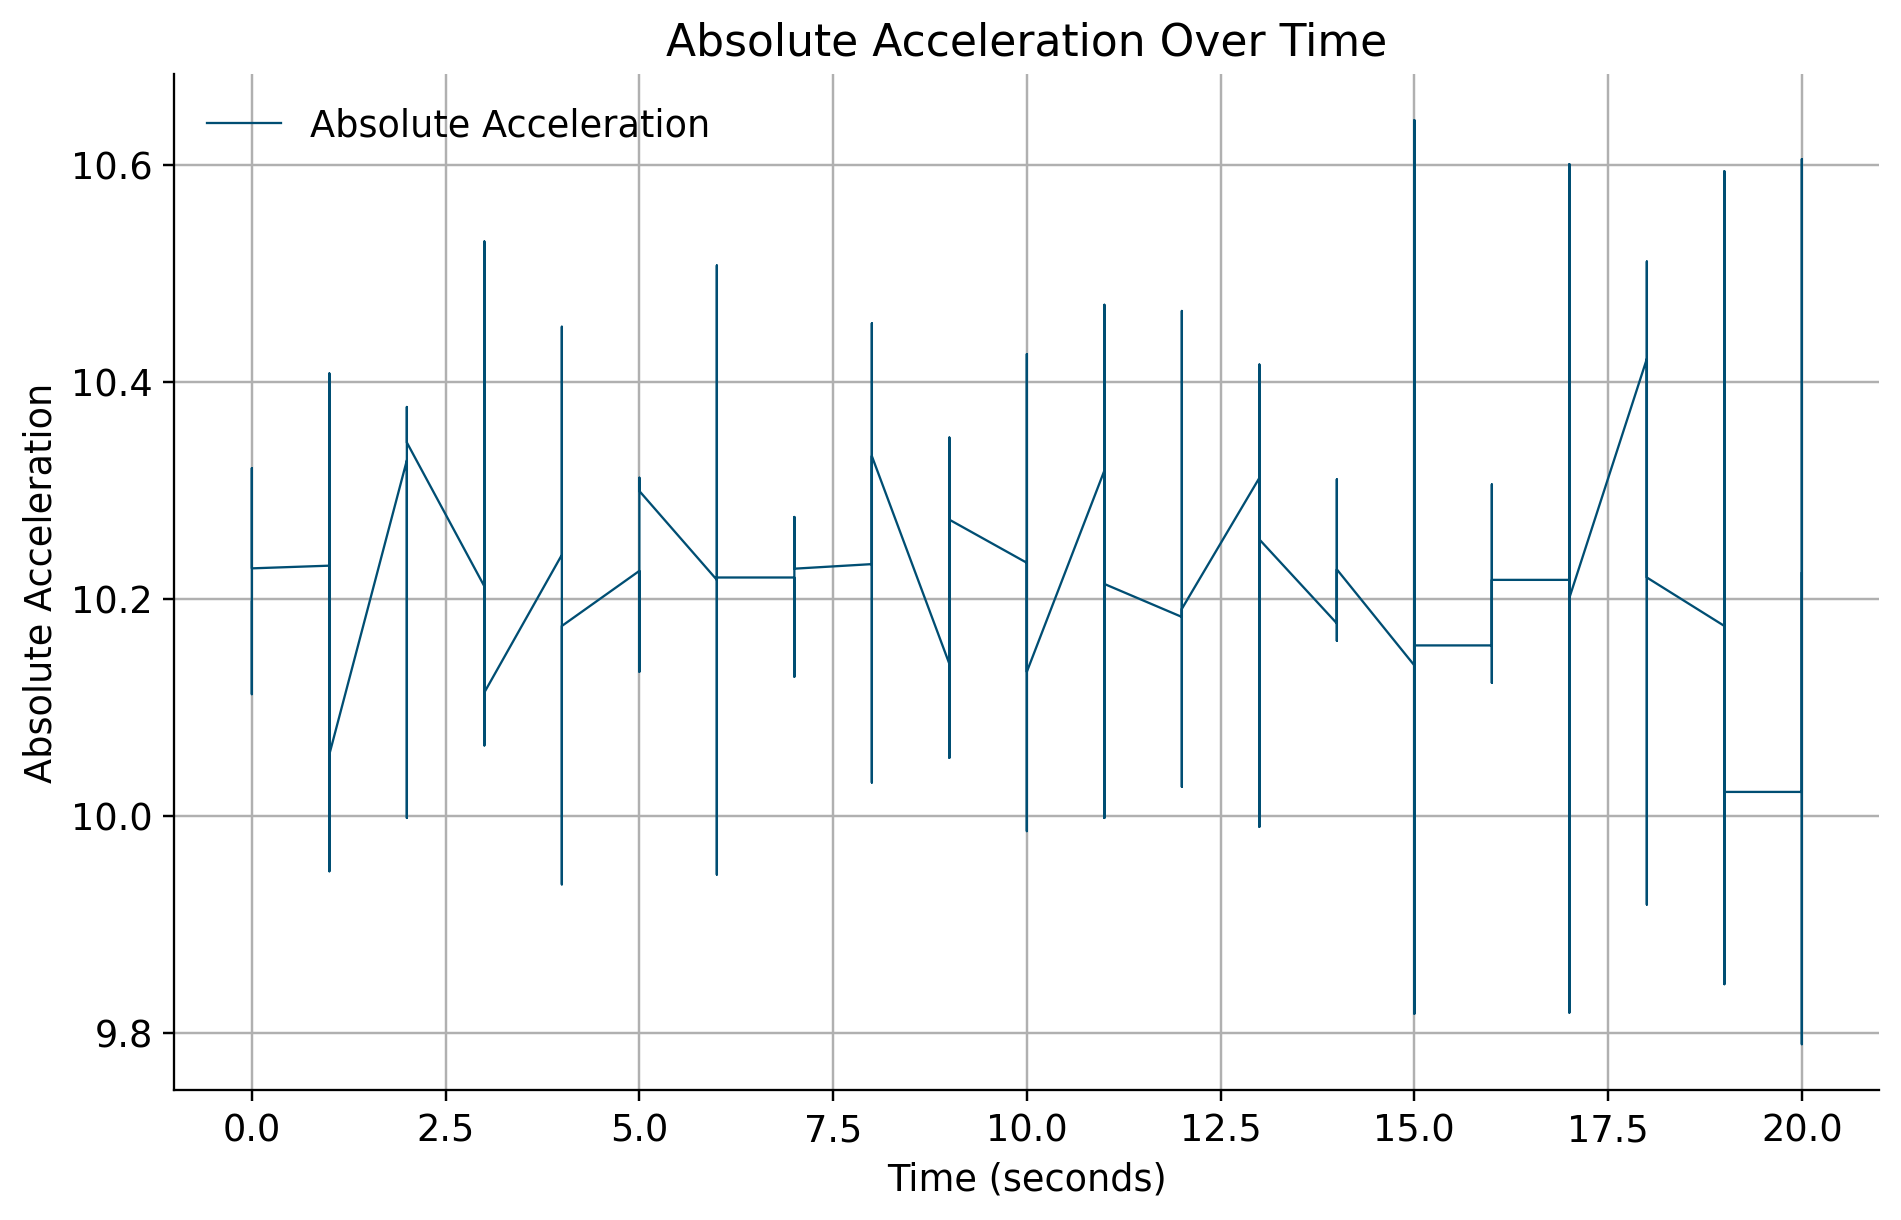

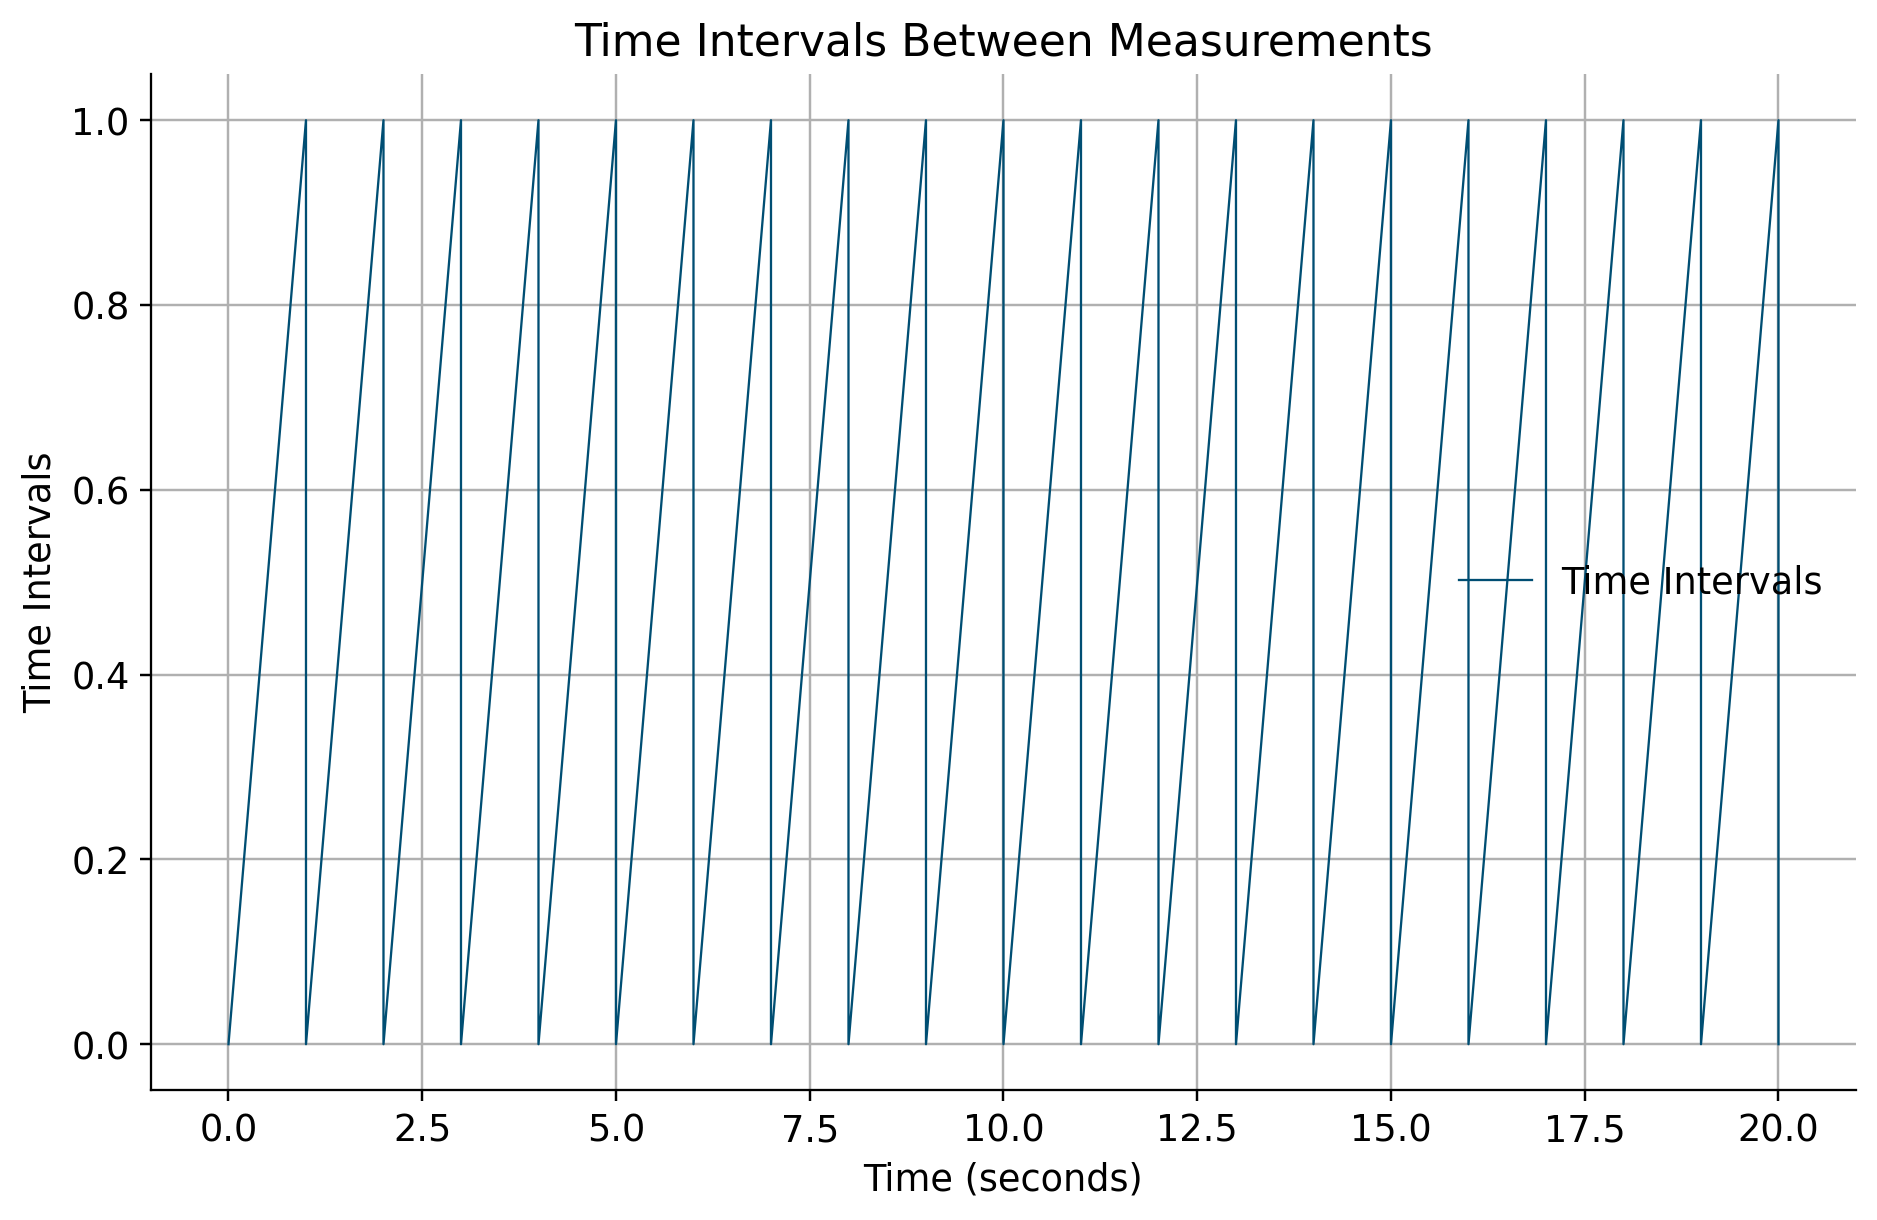

In [12]:
# Plotting the absolute acceleration over time
plt.figure(figsize=(10, 6))
plt.plot(t_np, results, label='Absolute Acceleration')
plt.title('Absolute Acceleration Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Absolute Acceleration')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the time intervals
time_intervals = np.diff(t_np)  # Calculate time intervals
plt.figure(figsize=(10, 6))
plt.plot(t_np[1:], time_intervals, label='Time Intervals')
plt.title('Time Intervals Between Measurements')
plt.xlabel('Time (seconds)')
plt.ylabel('Time Intervals')
plt.legend()
plt.grid(True)
plt.show()


#### 4. Interpolation der Messwerte



In [13]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.
equidistant_time_points, interpolated_data = interpolation(t_np, results)

#### 5 & 6. FFT durchführen und graphisch darstellen


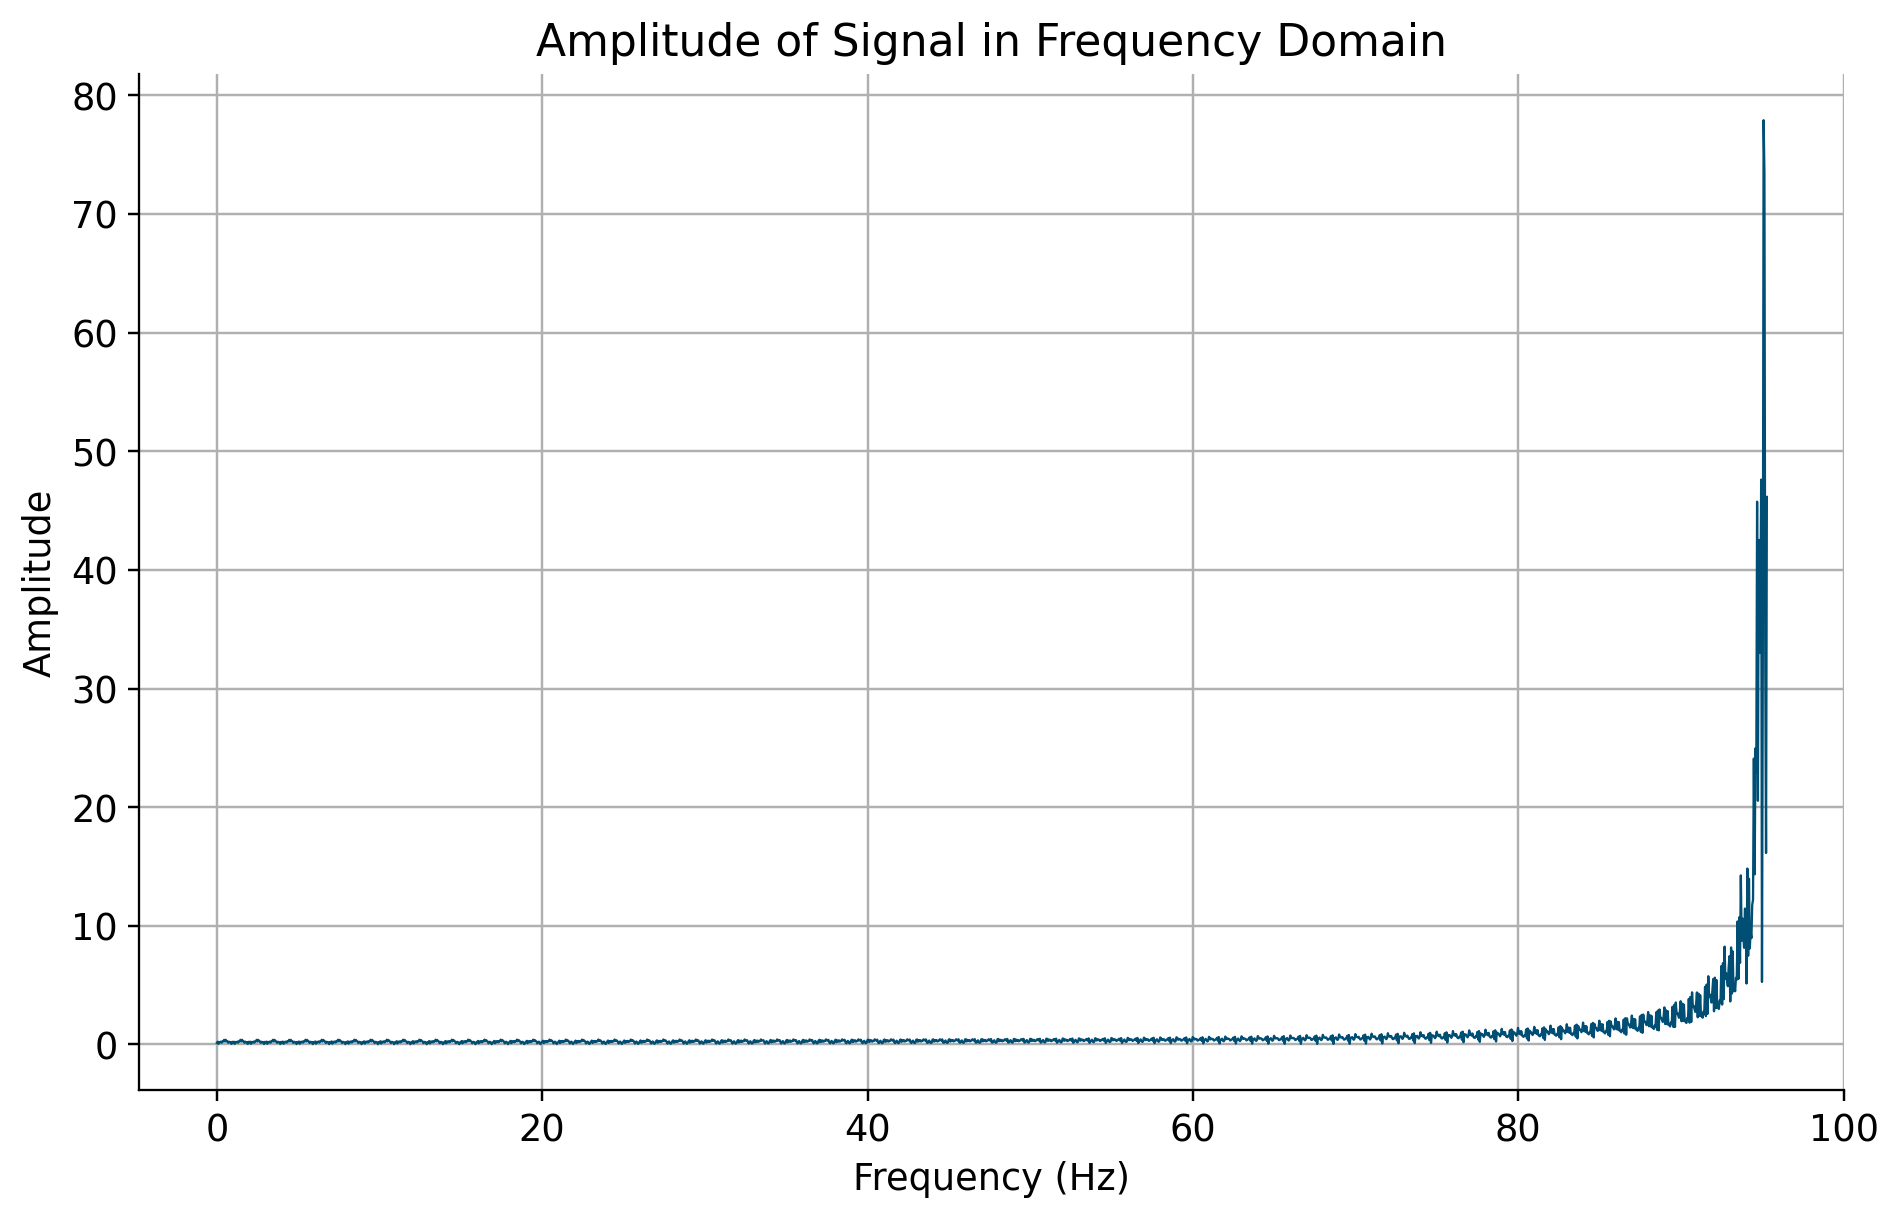

In [14]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Berechnen der FFT
amplitude, frequencies = my_fft(interpolated_data, equidistant_time_points)



plt.figure(figsize=(10, 6))
plt.plot(frequencies, amplitude)
plt.title('Amplitude of Signal in Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Diskussion
Anhand der Messergebnisse wird sichtbar, dass die Hauptfrequenzen des Lautsprechers und Handys durch eindeutige Amplitudenpeaks im Frequenzraum ermittelt und graphisch dargestellt werden können. Weiterhin fällt auf, dass bis zum Erreichen der Maximalfrequenzen auch geringere Frequenzen vorliegen, die jedoch in der Amplitude deutlich abgeschwächt sind.

## Fazit
Als Fazit lässt sich festhalten, dass mithilfe eines Beschleunigungssenors eine Fourier-Transformation auch bei haushaltsüblichen Objekten angewandt werden kann, um ausschlussreiche Informationen über deren Frequenzanteile zu erhalten.